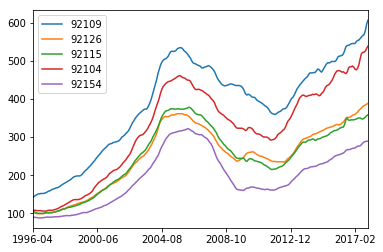

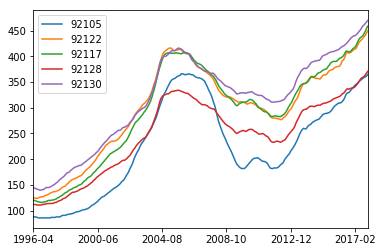

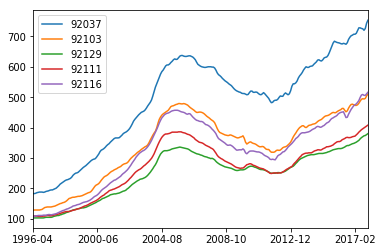

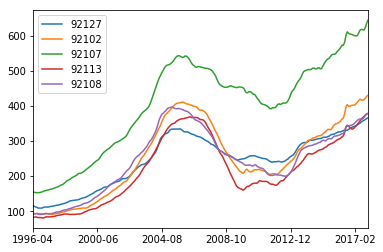

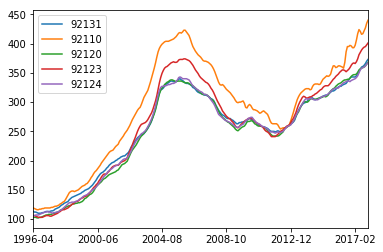

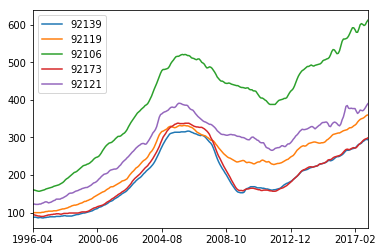

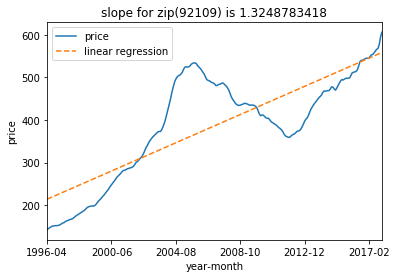

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Zip_MedianValuePerSqft_AllHomes.csv')
data_sd = data[data.City == 'San Diego'].dropna(axis=0)
data_sd = data_sd.reset_index(drop=True)
#print data_sd
for i in range(6):
    data_clip = data_sd.iloc[i*5:i*5+5,:]
    data_clip = data_clip.set_index(data_clip.RegionName.values)
    data_plt = data_clip.iloc[:,7:]
    plt.figure(i+1)
    data_plt.T.plot()
    plt.show()
plt.figure(7)
f = [[1,k] for k in range(261)]
thetaset1,resd1,rank,s=np.linalg.lstsq(f,data_sd.loc[0][7:].values)
data_test = data_sd.iloc[0,7:].T
data_test = data_test.to_frame(name = None)
x = np.arange(261)
y = thetaset1[0]+thetaset1[1]*x
data_test[1] = y
data_test[0].plot(label='price')
data_test[1].plot(linestyle='--',label='linear regression')
plt.legend()
plt.title('slope for zip({}) is {}'.format(data_sd.RegionName[0],thetaset1[1]))
plt.xlabel(u'year-month')
plt.ylabel(u'price')
plt.show()


In [23]:
slope=[]
for i in range(30):
    theta,resd1,rank,s=np.linalg.lstsq(f,data_sd.loc[i][7:].values)
    slope.append(theta[1])
print 'The max slope is {}, and its zipcode is {}'.format(max(slope),data_sd.RegionName.values[slope.index(max(slope))])



    

The max slope is 1.80670486835, and its zipcode is 92037


In [3]:
data_sd.RegionName.values

array([92109, 92126, 92115, 92104, 92154, 92105, 92122, 92117, 92128,
       92130, 92037, 92103, 92129, 92111, 92116, 92127, 92102, 92107,
       92113, 92108, 92131, 92110, 92120, 92123, 92124, 92139, 92119,
       92106, 92173, 92121])

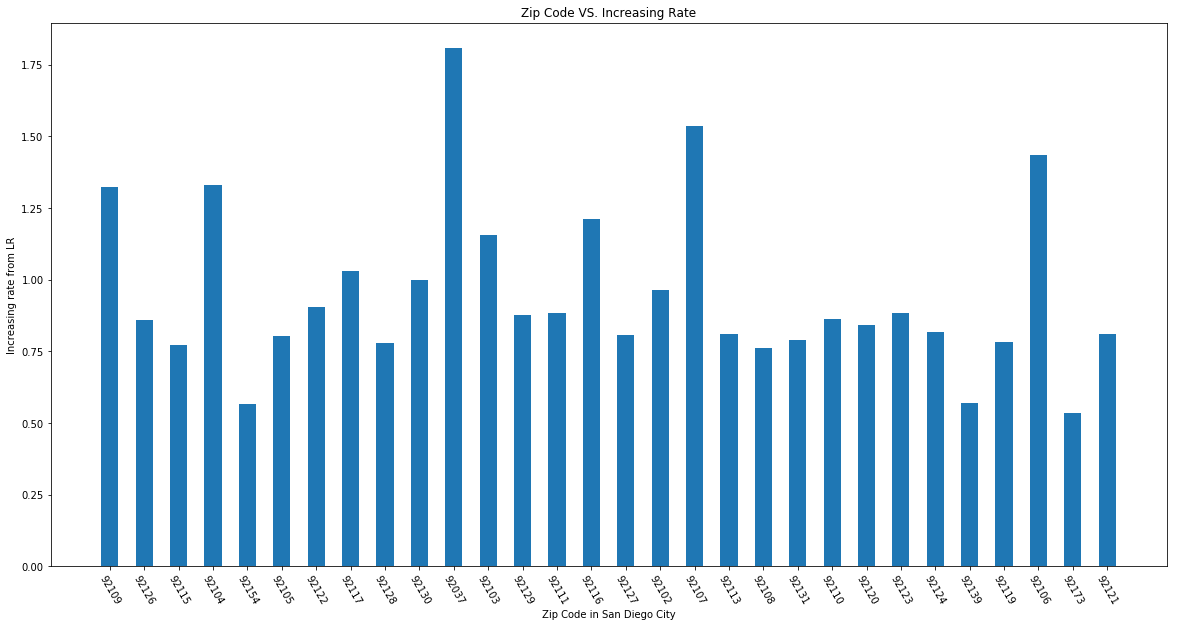

In [25]:
ind=range(30)
plt.figure(figsize=(20,10))
plt.bar(ind,slope,0.5)
plt.xticks(ind,data_sd.RegionName.values,rotation=-60)
plt.xlabel(u'Zip Code in San Diego City')
plt.ylabel(u'Increasing rate from LR')
plt.title('Zip Code VS. Increasing Rate')
plt.show()